# <font color='red'>Warning control</font>

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

# <font color='red'>Librairies importation</font>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# dataset importation
df = pd.read_csv('Data/NHANES.csv')

In [4]:
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5735 non-null   int64  
 1   ALQ101    5208 non-null   float64
 2   ALQ110    1731 non-null   float64
 3   ALQ130    3379 non-null   float64
 4   SMQ020    5735 non-null   int64  
 5   RIAGENDR  5735 non-null   int64  
 6   RIDAGEYR  5735 non-null   int64  
 7   RIDRETH1  5735 non-null   int64  
 8   DMDCITZN  5734 non-null   float64
 9   DMDEDUC2  5474 non-null   float64
 10  DMDMARTL  5474 non-null   float64
 11  DMDHHSIZ  5735 non-null   int64  
 12  WTINT2YR  5735 non-null   float64
 13  SDMVPSU   5735 non-null   int64  
 14  SDMVSTRA  5735 non-null   int64  
 15  INDFMPIR  5134 non-null   float64
 16  BPXSY1    5401 non-null   float64
 17  BPXDI1    5401 non-null   float64
 18  BPXSY2    5535 non-null   float64
 19  BPXDI2    5535 non-null   float64
 20  BMXWT     5666 non-null   floa

# <font color='red'>Data Scrubbing</font>

In [6]:
# Marital
df['DMDMARTL'] = df['DMDMARTL'].replace(
    {1.0:'Married', 2.0:'Widowed', 
    3.0:'Divorced', 4.0:'Separated',
    5.0:'Never married', 6.0:'Living with partner', 
    77.0:'Refused', np.nan:'Missing'})

# Gender
df['RIAGENDR'] = df['RIAGENDR'].replace({1:'Male', 2:'Female'})

# DMDEDUC2 variable : Academic level
df['DMDEDUC2'] = df['DMDEDUC2'].replace(
    {5.0:'College',  3.0:'HS/GED',  4.:'Some college/AA',  
     2.0:'9-11', np.nan:'Missing',  1.0:'<9',  
     9:"Don't know"})


In [7]:
df.isna().sum()

SEQN           0
ALQ101       527
ALQ110      4004
ALQ130      2356
SMQ020         0
RIAGENDR       0
RIDAGEYR       0
RIDRETH1       0
DMDCITZN       1
DMDEDUC2       0
DMDMARTL       0
DMDHHSIZ       0
WTINT2YR       0
SDMVPSU        0
SDMVSTRA       0
INDFMPIR     601
BPXSY1       334
BPXDI1       334
BPXSY2       200
BPXDI2       200
BMXWT         69
BMXHT         62
BMXBMI        73
BMXLEG       390
BMXARML      308
BMXARMC      308
BMXWAIST     367
HIQ210      1003
dtype: int64

In [8]:
# Inputation of missing values
df.fillna(df.mean(), inplace=True)

# check our new dataset
df.isna().sum()

SEQN        0
ALQ101      0
ALQ110      0
ALQ130      0
SMQ020      0
RIAGENDR    0
RIDAGEYR    0
RIDRETH1    0
DMDCITZN    0
DMDEDUC2    0
DMDMARTL    0
DMDHHSIZ    0
WTINT2YR    0
SDMVPSU     0
SDMVSTRA    0
INDFMPIR    0
BPXSY1      0
BPXDI1      0
BPXSY2      0
BPXDI2      0
BMXWT       0
BMXHT       0
BMXBMI      0
BMXLEG      0
BMXARML     0
BMXARMC     0
BMXWAIST    0
HIQ210      0
dtype: int64

# <font color='red'>Point Spread and Pearson coefficient</font>

Text(0.5, 1.0, 'Relation between leg and arm lenghts')

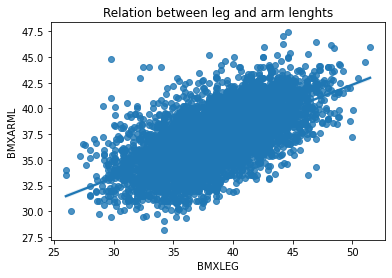

In [18]:
# fig = plt.figure(figsize=(10,8))
# sns.scatterplot(x='BMXLEG', y='BMXARML', data=df).set_title('Relation between leg and arm lenghts')
# sns.regplot(x='BMXLEG', y='BMXARML',fit_reg=False, data=df).set_title('Relation between leg and arm lenghts')
sns.regplot(x='BMXLEG', y='BMXARML', data=df).set_title('Relation between leg and arm lenghts')

### <font color='red'>Pearson correlation coefficient</font>

In [10]:
stats.pearsonr(df['BMXLEG'], df['BMXARML'])

(0.6189135459893191, 0.0)

### <font color='red'>Correlation map</font>

Text(0.5, 1.0, 'Pearson correlation maps')

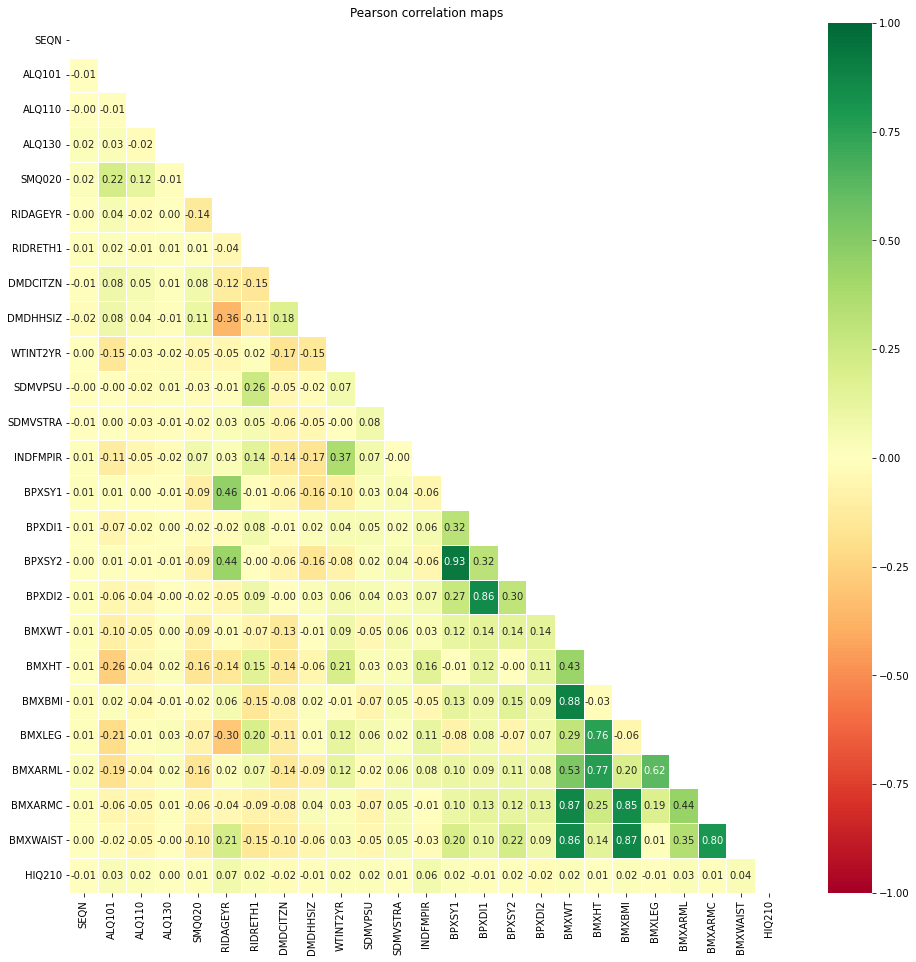

In [11]:
# sns.heatmap(df.corr())

fig = plt.figure(figsize=(16, 16))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask,center=0,
           cmap='RdYlGn', linewidths=1,
           annot=True, fmt=".2f", vmin=-1, vmax=1)

plt.title('Pearson correlation maps')

### <font color='red'>Pearson correlation based on other variables</font>

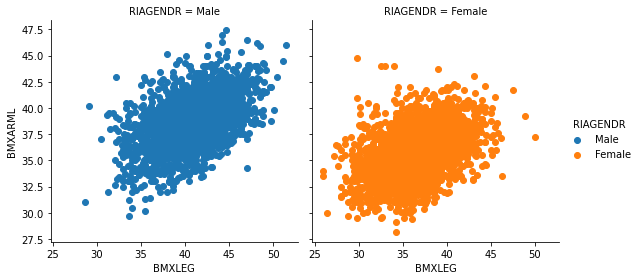

In [12]:
# Relation between 'BMXARML' and 'BMXLEG' according to gender
sns.FacetGrid(df, col='RIAGENDR', hue='RIAGENDR', size=4).map(
                  plt.scatter,'BMXLEG', 'BMXARML').add_legend()

In [13]:
# Pearson correlation coefficient based on gender
for i in df['RIAGENDR'].unique():
    pearson_i = stats.pearsonr(df[df['RIAGENDR'] == i]['BMXLEG'], df[df['RIAGENDR'] == i]['BMXARML'])
    print(f"Pearson correlation coefficient for '{i}': {pearson_i[0]}")

Pearson correlation coefficient for 'Male': 0.5104480992874494
Pearson correlation coefficient for 'Female': 0.44172076781315406


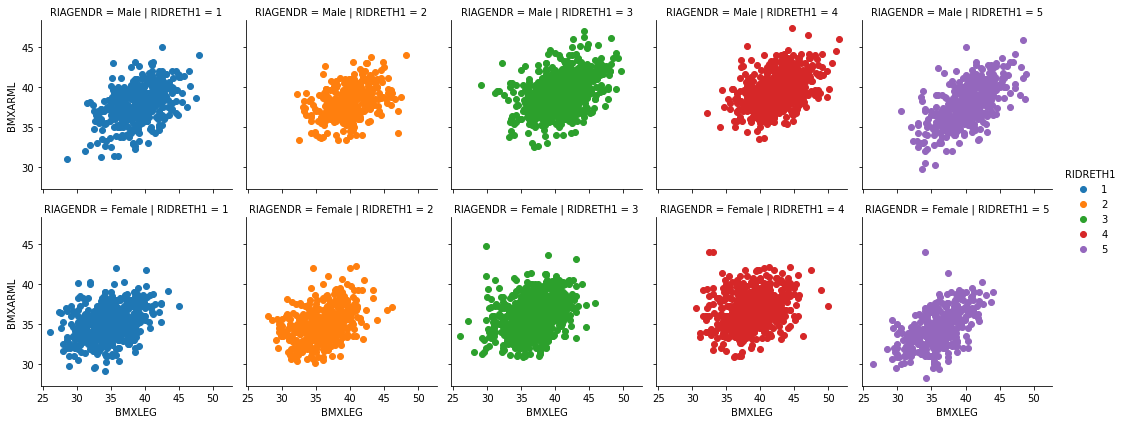

In [14]:
# Pearson correlation coefficient based on ethny and gender
sns.FacetGrid(df, col='RIDRETH1', row='RIAGENDR', hue='RIDRETH1').\
              map(plt.scatter, 'BMXLEG', 'BMXARML' ).add_legend()

# <font color='red'>2D point density</font>

<AxesSubplot:xlabel='BMXLEG', ylabel='BMXARML'>

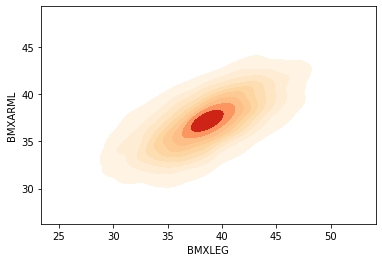

In [15]:
# Density between 'BMXARML' and 'BMXLEG'

sns.kdeplot(x='BMXLEG', y='BMXARML', cmap='OrRd', shade=True, data=df)

<AxesSubplot:xlabel='BMXBMI', ylabel='BPXSY1'>

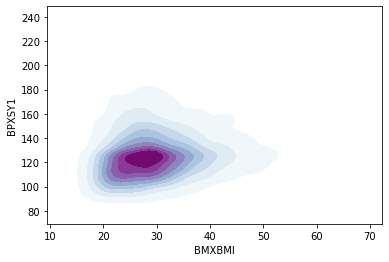

In [16]:
# Density between 'BMXBMI' and 'BPXSY1'
sns.kdeplot(x='BMXBMI', y='BPXSY1', cmap='BuPu', shade=True, data=df)

In [17]:
stats.pearsonr(df['BMXBMI'], df['BPXSY1'])

(0.12841332998811403, 1.6222184363035764e-22)